### Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
print(X.shape)

(150, 4)


In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


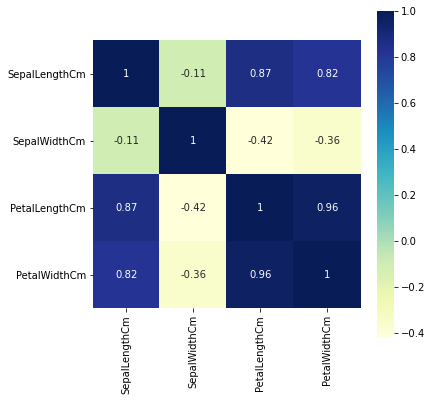

In [8]:
#Correlation
plt.figure(figsize=(6,6))
corrmat = dataset.drop('Id', axis =1).corr()
sns.heatmap(corrmat, annot = True, square = True, cmap='YlGnBu')
plt.show()

PetalWidth and PetalLength are highly correlated. 

## Using the elbow method to find the optimal number of clusters

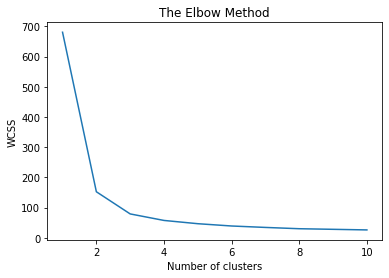

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So by elbow method the optimal number of clusters is 3

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

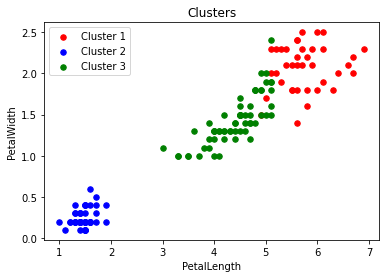

In [12]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 30, c = 'green', label = 'Cluster 3')
plt.title("Clusters")
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

#### Labeling the predictions

In [13]:
#considering - 
#0 Corresponds to 'Iris-setosa'
#1 Corresponds to 'Iris-versicolour'
#2 Corresponds to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

In [14]:
new_data = dataset.copy()
new_data["Cluster"] = y_kmeans
new_data = new_data.drop('Species', axis =1)
new_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-versicolour
1,2,4.9,3.0,1.4,0.2,Iris-versicolour
2,3,4.7,3.2,1.3,0.2,Iris-versicolour
3,4,4.6,3.1,1.5,0.2,Iris-versicolour
4,5,5.0,3.6,1.4,0.2,Iris-versicolour


In [15]:
new_data['Cluster'].value_counts()

Iris-virginica      62
Iris-versicolour    50
Iris-setosa         38
Name: Cluster, dtype: int64

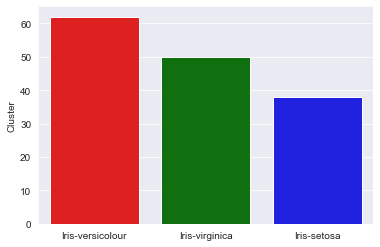

In [19]:
sns.set_style('darkgrid')
sns.barplot(x = new_data["Cluster"] .unique(),
            y = new_data["Cluster"] .value_counts(),
            palette=sns.color_palette(["red", "green", "blue"]));

There are around 62 iris-versicolour , 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset as predicted.